In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import os
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent))
from copy import deepcopy

from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch

from data_loader import MagnetotailDataset
from Helper.plotting import plot_variables_from_sections
from Helper.shue_model import filter_train_samples_by_time
from statistical_methods import HysteresisGradientBoostedTree

In [2]:
# TRAINING DATASET
file_path = Path('..') / "Data" / "training_data" / "artemis_P1_v2.h5"
abs_file_path = file_path.resolve()

# Create dataset
dataset = MagnetotailDataset(abs_file_path)

Setting trainable samples for each section...


100%|██████████| 77/77 [00:00<00:00, 261.83it/s]


Computing plasma beta for each section...


100%|██████████| 77/77 [00:01<00:00, 41.98it/s]


Extracting magnetic field x-component for each section...


100%|██████████| 77/77 [00:00<?, ?it/s]


Computing magnetic field magnitude for each section...


100%|██████████| 77/77 [00:00<?, ?it/s]


Computing ion velocity magnitude for each section...


100%|██████████| 77/77 [00:00<?, ?it/s]


Extracting ion velocity x-component for each section...


100%|██████████| 77/77 [00:00<?, ?it/s]


In [3]:
dataset.get_session_info()

[{'id': 'session_0000',
  'start_time': '2011-08-10T00:35:00.000000000',
  'end_time': '2011-08-10T23:05:00.000000000',
  'data_origin': 'Themis_B',
  'num_timestamps': 135,
  'variables': ['electron_avgtemp',
   'electron_density',
   'electron_eflux',
   'electron_velocity_gsm',
   'electron_vthermal',
   'ion_avgtemp',
   'ion_density',
   'ion_eflux',
   'ion_velocity_gsm',
   'ion_vthermal',
   'magnetic_field_gsm',
   'times']},
 {'id': 'session_0001',
  'start_time': '2011-09-08T16:35:00.000000000',
  'end_time': '2011-09-09T15:05:00.000000000',
  'data_origin': 'Themis_B',
  'num_timestamps': 135,
  'variables': ['electron_avgtemp',
   'electron_density',
   'electron_eflux',
   'electron_velocity_gsm',
   'electron_vthermal',
   'ion_avgtemp',
   'ion_density',
   'ion_eflux',
   'ion_velocity_gsm',
   'ion_vthermal',
   'magnetic_field_gsm',
   'times']},
 {'id': 'session_0002',
  'start_time': '2011-10-08T02:50:00.000000000',
  'end_time': '2011-10-09T01:20:00.000000000',
  

In [ ]:
# TESTING DATASET
file_path = Path('..') / "Data" / "testing_data" / "artemis_P1_v4.h5"
abs_file_path = file_path.resolve()

# Create dataset
testing_dataset = MagnetotailDataset(abs_file_path)
# Get the samples from the dataset
test_samples = testing_dataset.get_trainable_samples()

boundary_time = np.datetime64('2012-08-29T00:00:00.000000000', 'ns')



Setting trainable samples for each section...


100%|██████████| 32/32 [00:00<00:00, 150.00it/s]


Computing plasma beta for each section...


100%|██████████| 32/32 [00:02<00:00, 14.01it/s]


Extracting magnetic field x-component for each section...


100%|██████████| 32/32 [00:00<?, ?it/s]


Computing magnetic field magnitude for each section...


100%|██████████| 32/32 [00:00<?, ?it/s]


Computing ion velocity magnitude for each section...


100%|██████████| 32/32 [00:00<00:00, 32017.59it/s]


Extracting ion velocity x-component for each section...


100%|██████████| 32/32 [00:00<00:00, 31722.46it/s]


In [139]:
# TRAINING DATASET
file_path = Path('..') / "Data" / "training_data" / "artemis_P1_v4.h5"
abs_file_path = file_path.resolve()

# Create dataset
dataset = MagnetotailDataset(abs_file_path)

dataset.set_regions_for_sections(overwrite=False, filepath='regions_artemis_P1_v4/section_to_region_map_non_strict.npz')

# Get the trainable samples from the dataset
train_samples = dataset.get_trainable_samples()

# Use only samples after a certain time
boundary_time = np.datetime64('2012-08-29T00:00:00.000000000', 'ns')

# Apply the function
accuracy_samples = filter_train_samples_by_time(train_samples, dataset, boundary_time, method='more_than', data_origin_exclude_always='Themis_C')

Setting trainable samples for each section...


100%|██████████| 162/162 [00:00<00:00, 278.60it/s]


Computing plasma beta for each section...


100%|██████████| 162/162 [00:04<00:00, 38.78it/s]


Extracting magnetic field x-component for each section...


100%|██████████| 162/162 [00:00<00:00, 160557.01it/s]


Computing magnetic field magnitude for each section...


100%|██████████| 162/162 [00:00<00:00, 54072.68it/s]


Computing ion velocity magnitude for each section...


100%|██████████| 162/162 [00:00<00:00, 53905.37it/s]


Extracting ion velocity x-component for each section...


100%|██████████| 162/162 [00:00<00:00, 80803.57it/s]


In [7]:
import pandas as pd

file_path = Path('..') / "Data" / "ART_Xing_times_pos.xlsx"
abs_file_path = file_path.resolve()
# Read the Excel file and extract the first sheet with last 4 columns
df = pd.read_excel(abs_file_path, sheet_name=0)
df = df.iloc[:, -7:-1]  # Keep only the last 4 columns (last one is bugged so it is written with -5 to -1)

crossing_times_ns = pd.to_datetime(df['coupled time']).values.astype('datetime64[ns]')

In [ ]:
### FILTER TRAIN AND TEST SAMPLES BASED ON TIME ###

# get keys and values from the dictionary
train_samples_keys = list(train_samples.keys())
train_samples_values = list(train_samples.values())


train_samples = filter_train_samples_by_time(train_samples, dataset, boundary_time, method='less_than')
validation_samples = filter_train_samples_by_time(test_samples, testing_dataset, boundary_time, method='more_than')

In [129]:
from tqdm import tqdm

list_scores = []
for k in tqdm(range(1, 5)):

    DecisionTreeModel = HysteresisGradientBoostedTree(feature_keys=['ion_eflux', 'ion_density', 'ion_avgtemp', 'ion_velocity_magnitude'], max_depth=6)
    DecisionTreeModel.fit(train_samples, crossing_times_ns, window_average=k)
    list_scores_window = []
    for i in range(1, 10):

        list_scores_overlap = []


        for j in range(1, 5):

            # 'plasma_beta' 'magnetic_field_gsm_magnitude'h=10
            # Exclude sections list

            DecisionTreeModel.window_size = 2*i
            DecisionTreeModel.threshold = i
            DecisionTreeModel.no_overlap = j


            results = DecisionTreeModel.get_results(validation_samples, dataset=testing_dataset, crossings=crossing_times_ns,  legacy_predict=False)

            score = DecisionTreeModel.get_model_score(results)
            score_values = score['results_dataframe']['Value'].values

            # Convert all values to float
            score_values = score_values.astype(float)

            list_scores_overlap.append(score_values)
        list_scores_window.append(np.array(list_scores_overlap))

    list_scores.append(np.array(list_scores_window))


100%|██████████| 4/4 [16:11<00:00, 242.89s/it]


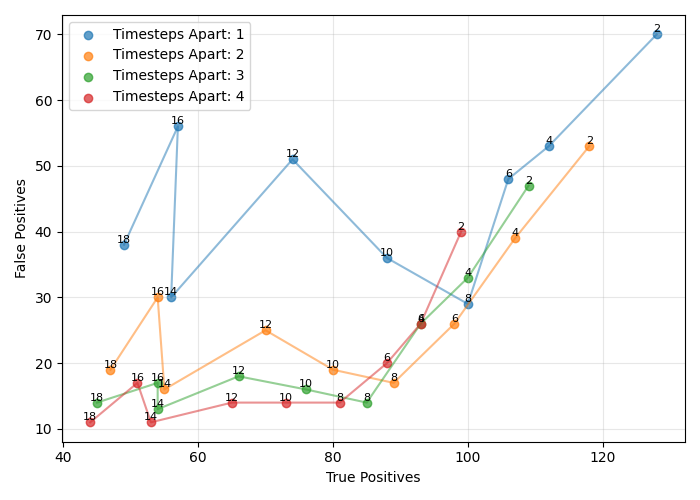

In [130]:
# Extract False Positives and True Positives for plotting
fig, ax = plt.subplots(figsize=(7, 5))

# Iterate through different no_overlap values
for overlap_idx in range(4):  # 5 different no_overlap values (0-4)
    false_positives = []
    true_positives = []
    window_sizes = []
    
    # Extract FP and TP for each window size at this overlap setting
    for window_idx, scores_overlap in enumerate(list_scores[2]):

            
        scores = scores_overlap[overlap_idx]  # Get scores for this overlap_idx
        
        # Assuming the scores array contains [TP, FP, TN, FN] or similar format
        # You may need to adjust these indices based on your actual score format
        tp = scores[3]  # True Positives
        fp = scores[6]  # False Positives
        
        true_positives.append(tp)
        false_positives.append(fp)
        window_sizes.append(2*window_idx+2)  # Window size is 2*i based on your loop
    
    # Plot with different colors for each no_overlap value
    scatter = ax.scatter(true_positives, false_positives, label=f'Timesteps Apart: {overlap_idx+1}', alpha=0.7)
    ax.plot(true_positives, false_positives, alpha=0.5)
    
    # Add window size labels at each point
    for i, (tp, fp, ws) in enumerate(zip(true_positives, false_positives, window_sizes)):
        ax.text(tp, fp, str(ws), fontsize=8, ha='center', va='bottom')

ax.set_xlabel('True Positives')
ax.set_ylabel('False Positives')
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

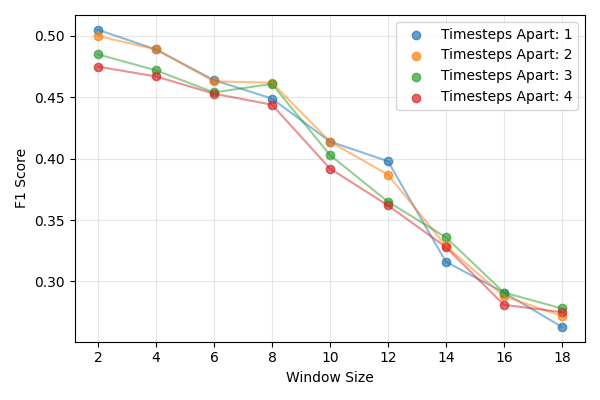

In [131]:
# Extract False Positives and True Positives for plotting
fig, ax = plt.subplots(figsize=(6, 4))


for overlap_idx in range(4):
    window_sizes = []

    f1_scores = []
    # Extract FP and TP for each window size at this overlap setting
    for window_idx, scores_overlap in enumerate(list_scores[3]):

        scores = scores_overlap[overlap_idx]  # Get scores for this overlap_idx
        f1_scores.append(scores[9])
        window_sizes.append(2*window_idx+2)  # Window size is 2*i based on your loop
    

    # Plot with different colors for each no_overlap value
    scatter = ax.scatter(window_sizes, f1_scores, label=f'Timesteps Apart: {overlap_idx+1}', alpha=0.7)
    ax.plot(window_sizes, f1_scores, alpha=0.5)

ax.set_xlabel('Window Size')
ax.set_ylabel('F1 Score')
ax.set_xticks(window_sizes)
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()


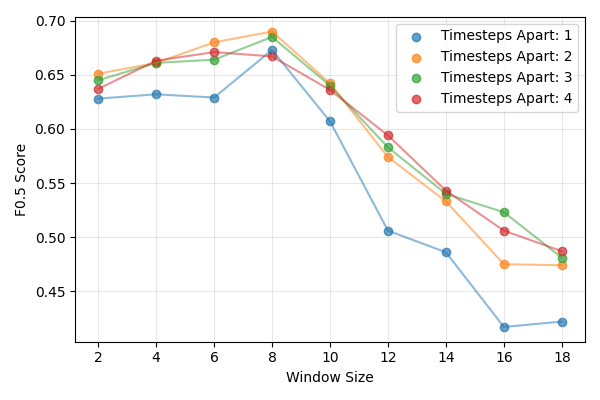

In [132]:
# Extract False Positives and True Positives for plotting
fig, ax = plt.subplots(figsize=(6, 4))


for overlap_idx in range(4):
    window_sizes = []

    f0_5_scores = []
    # Extract FP and TP for each window size at this overlap setting
    for window_idx, scores_overlap in enumerate(list_scores[2]):

            
        scores = scores_overlap[overlap_idx]  # Get scores for this overlap_idx
        f0_5_scores.append(scores[10])
        window_sizes.append(2*window_idx+2)  # Window size is 2*i based on your loop    
    # Plot with different colors for each no_overlap value
    scatter = ax.scatter(window_sizes, f0_5_scores, label=f'Timesteps Apart: {overlap_idx+1}', alpha=0.7)
    ax.plot(window_sizes, f0_5_scores, alpha=0.5)

ax.set_xlabel('Window Size')
ax.set_ylabel('F0.5 Score')
ax.set_xticks(window_sizes)
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

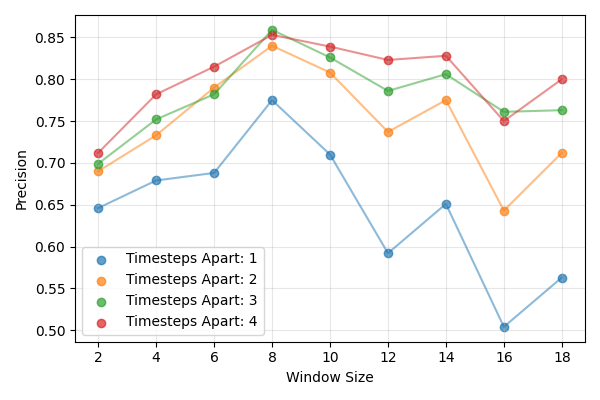

In [133]:
# Extract False Positives and True Positives for plotting
fig, ax = plt.subplots(figsize=(6, 4))


for overlap_idx in range(4):
    window_sizes = []
    precisions = []
    # Extract FP and TP for each window size at this overlap setting
    for window_idx, scores_overlap in enumerate(list_scores[2]):
            
        scores = scores_overlap[overlap_idx]  # Get scores for this overlap_idx
        precisions.append(scores[8])
        window_sizes.append(2*window_idx+2)  # Window size is 2*i based on your loop

    # Plot with different colors for each no_overlap value
    scatter = ax.scatter(window_sizes, precisions, label=f'Timesteps Apart: {overlap_idx+1}', alpha=0.7)
    ax.plot(window_sizes, precisions, alpha=0.5)

ax.set_xlabel('Window Size')
ax.set_ylabel('Precision')
ax.set_xticks(window_sizes)
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

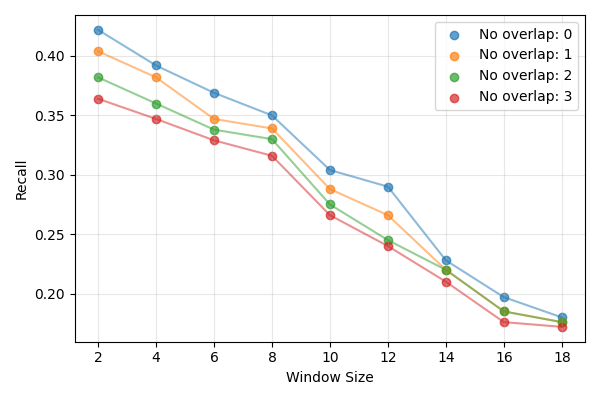

In [134]:
# Extract False Positives and True Positives for plotting
fig, ax = plt.subplots(figsize=(6, 4))



for overlap_idx in range(4):
    window_sizes = []
    recalls = []
    # Extract FP and TP for each window size at this overlap setting
    for window_idx, scores_overlap in enumerate(list_scores[3]):

            
        scores = scores_overlap[overlap_idx]  # Get scores for this overlap_idx
        recalls.append(scores[0])
        window_sizes.append(2*window_idx+2)  # Window size is 2*i based on your loop

    # Plot with different colors for each no_overlap value
    scatter = ax.scatter(window_sizes, recalls, label=f'No overlap: {overlap_idx}', alpha=0.7)
    ax.plot(window_sizes, recalls, alpha=0.5)

ax.set_xlabel('Window Size')
ax.set_ylabel('Recall')
ax.set_xticks(window_sizes)
ax.grid(True, alpha=0.3)
ax.legend()
plt.tight_layout()
plt.show()

In [140]:
DecisionTreeModel.evaluate(accuracy_samples)

(0.9998508130687752,
 {'magnetosheath': {'precision': 1.0,
   'recall': 0.9994391475042064,
   'f1-score': 0.9997194950911641,
   'support': 1783.0},
  'magnetotail': {'precision': 0.9997967892704734,
   'recall': 1.0,
   'f1-score': 0.9998983843105376,
   'support': 4920.0},
  'accuracy': 0.9998508130687752,
  'macro avg': {'precision': 0.9998983946352367,
   'recall': 0.9997195737521032,
   'f1-score': 0.9998089397008508,
   'support': 6703.0},
  'weighted avg': {'precision': 0.9998508433851603,
   'recall': 0.9998508130687752,
   'f1-score': 0.9998507997248084,
   'support': 6703.0}})

In [17]:
scores.reshape(-1, 1).shape

(16, 1)

In [118]:
score_dict = {'Metrics': np.array(score['results_dataframe']['Metric']), 'Scores': list_scores[2][1][1]}

In [119]:
score_dict['Scores']

array([  0.493,   0.255,   0.507, 111.   , 141.   ,  37.   ,  38.   ,
       114.   ,   0.745,   0.594,   0.676, 235.   , 149.   ,  30.   ,
        13.53 ,   6.72 ])

In [120]:
scores_df = pd.DataFrame(score_dict)
scores_df

,Metrics,Scores
0,True Positive Rate,0.493
1,False Positive Rate,0.255
2,False Negative Rate,0.507
3,True Positives,111.000
4,In Range Positives,141.000
5,Out Range Predicted Positives,37.000
6,False Positives,38.000
7,False Negatives,114.000
8,Precision,0.745
9,F1 Score,0.594


In [268]:
sections_to_exclude = ['section_020', 'section_021', 'section_022', 'section_023', 'section_024']
test_samples = {k: samples[k] for k in sections_to_exclude if k in samples.keys()}

In [271]:
DecisionTreeModel.hysteresis_threshold = 0.1
DecisionTreeModel.time_hysteresis = 2
results = DecisionTreeModel.get_results(test_samples, dataset, legacy_predict=True)

In [272]:
score = DecisionTreeModel.get_model_score(results, time_window_minutes=20)
score['results_dataframe']

,Metric,Value
0,True Positive Rate,0.440
1,False Positive Rate,0.746
2,False Negative Rate,0.388
3,True Positives,74
4,In Range Positives,81
5,Out Range Predicted Positives,181
6,False Positives,217
7,False Negatives,47
8,Precision,0.254
9,F1 Score,0.322


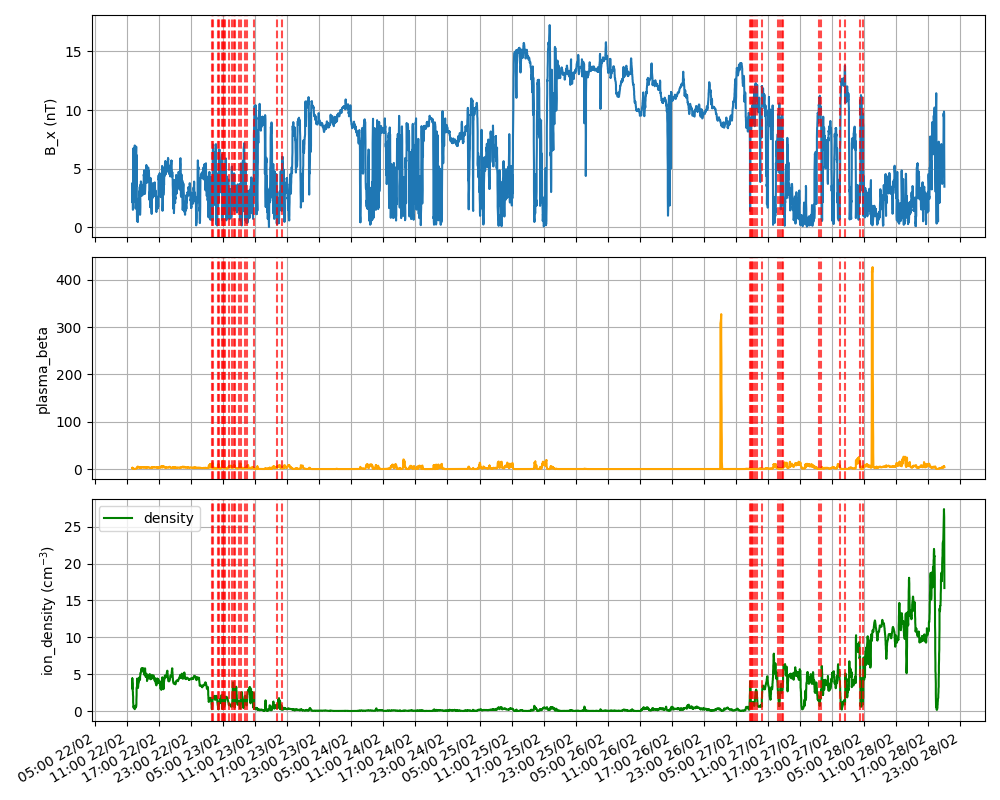

In [ ]:
def moving_average_with_padding(data, window_size):
    """
    Apply moving average to data while maintaining the same length by padding.
    
    Args:
        data: torch.Tensor - input data
        window_size: int - size of the moving average window
    
    Returns:
        torch.Tensor - smoothed data with same length as input
    """
    if window_size <= 1:
        return data
    
    # Convert to numpy for easier handling
    data_np = data.numpy() if isinstance(data, torch.Tensor) else data
    
    # Apply moving average using convolution
    kernel = np.ones(window_size) / window_size
    smoothed = np.convolve(data_np, kernel, mode='same')
    
    # Convert back to torch tensor if input was tensor
    if isinstance(data, torch.Tensor):
        return torch.tensor(smoothed, dtype=data.dtype)
    return smoothed

# Define the times for vertical lines
vertical_line_times = [
    # 23/02/2013 dates
    datetime.datetime(2013, 2, 23, 2, 55),
    datetime.datetime(2013, 2, 23, 3, 5),
    datetime.datetime(2013, 2, 23, 4, 5),
    datetime.datetime(2013, 2, 23, 4, 15),
    datetime.datetime(2013, 2, 23, 4, 50),
    datetime.datetime(2013, 2, 23, 5, 0),
    datetime.datetime(2013, 2, 23, 5, 10),
    datetime.datetime(2013, 2, 23, 5, 25),
    datetime.datetime(2013, 2, 23, 6, 10),
    datetime.datetime(2013, 2, 23, 6, 45),
    datetime.datetime(2013, 2, 23, 7, 5),
    datetime.datetime(2013, 2, 23, 7, 15),
    datetime.datetime(2013, 2, 23, 8, 0),
    datetime.datetime(2013, 2, 23, 8, 20),
    datetime.datetime(2013, 2, 23, 9, 10),
    datetime.datetime(2013, 2, 23, 9, 30),
    datetime.datetime(2013, 2, 23, 10, 45),
    datetime.datetime(2013, 2, 23, 15, 0),
    datetime.datetime(2013, 2, 23, 16, 0),
    # 27/02/2013 dates
    datetime.datetime(2013, 2, 27, 7, 35),
    datetime.datetime(2013, 2, 27, 7, 45),
    datetime.datetime(2013, 2, 27, 8, 0),
    datetime.datetime(2013, 2, 27, 8, 15),
    datetime.datetime(2013, 2, 27, 8, 35),
    datetime.datetime(2013, 2, 27, 8, 55),
    datetime.datetime(2013, 2, 27, 9, 50),
    datetime.datetime(2013, 2, 27, 12, 55),
    datetime.datetime(2013, 2, 27, 13, 10),
    datetime.datetime(2013, 2, 27, 13, 35),
    datetime.datetime(2013, 2, 27, 13, 45),
    datetime.datetime(2013, 2, 27, 20, 30),
    datetime.datetime(2013, 2, 27, 20, 50),
    # 28/02/2013 dates
    datetime.datetime(2013, 2, 28, 0, 30),
    datetime.datetime(2013, 2, 28, 1, 25),
    datetime.datetime(2013, 2, 28, 4, 15),
    datetime.datetime(2013, 2, 28, 4, 50)
]

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,8))

times = dataset.get_section_times()['section_000']

# Apply moving average to the variables
window_size = 3  # Adjust as needed
B_x_smoothed = moving_average_with_padding(samples['section_000']['magnetic_field_gsm_x'], window_size)
# B_x_smoothed = remove_outliers_with_local_interpolation(B_x_smoothed, 2, window_size=300)
plasma_beta_smoothed = moving_average_with_padding(samples['section_000']['plasma_beta'], window_size)
# plasma_beta_smoothed = remove_outliers_with_local_interpolation(plasma_beta_smoothed, 2, window_size=300)
# plasma_beta_smoothed, _, _ = downweight_variable(plasma_beta_smoothed, kappa_pct=80, p=4, smoother_win=300)
# plasma_beta_smoothed = torch.log10(plasma_beta_smoothed + 1e-6)  # Avoid log(0)
ion_n_smoothed = moving_average_with_padding(samples['section_000']['ion_density'], window_size)
# ion_n_smoothed = remove_outliers_with_local_interpolation(ion_n_smoothed, 2, window_size=300)

axs[0].plot(times, B_x_smoothed, label='B_x')
axs[0].grid()
axs[0].set_ylabel('B_x (nT)')
axs[0].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M %d/%m'))
axs[0].xaxis.set_major_locator(matplotlib.dates.HourLocator(interval=6))

axs[1].plot(times, plasma_beta_smoothed, label='plasma_beta', color='orange')
axs[1].grid()
axs[1].set_ylabel('plasma_beta')
axs[1].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M %d/%m'))
axs[1].xaxis.set_major_locator(matplotlib.dates.HourLocator(interval=6))

axs[2].plot(times, ion_n_smoothed, label='density', color='green')
axs[2].grid()
axs[2].set_ylabel('ion_density (cm$^{-3}$)')
axs[2].xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M %d/%m'))
axs[2].xaxis.set_major_locator(matplotlib.dates.HourLocator(interval=6))

# Add vertical lines to all subplots
for vline_time in vertical_line_times:
    for ax in axs:
        ax.axvline(x=vline_time, color='red', linestyle='--', alpha=0.7)

fig.autofmt_xdate()
plt.legend()
plt.tight_layout()
plt.show()